In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

plt.rcParams.update({'font.size': 17})

# Generar conjuto de datos

In [ ]:


# Simular datos de entrenamiento para entrenar la red neuronal
def generate_training_data():
    np.random.seed(42)
    X = []
    y = []
    for i in range(1000):
        # Generar errores y sus derivadas al azar
        error = np.random.uniform(-1000, 1000)
        integral = np.random.uniform(-1000, 1000)
        derivative = np.random.uniform(-1000, 1000)

        # Entradas
        X.append([error, integral, derivative])

        # Generar valores de Kp, Ki, Kd en función del error y sus derivadas
        Kp = 500 + 0.1 * error
        Ki = 1 + 0.01 * integral
        Kd = 10 + 0.05 * derivative
        y.append([Kp, Ki, Kd])

    return np.array(X), np.array(y)
X, y = generate_training_data()

# **Grid Search**

In [ ]:


# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dividir en entrenamiento y validación (para hiperparámetros)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Definir la cuadrícula de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(20, 20),(30, 30), (45, 45), (60, 60),(30, 30, 30), (20,20,20)],
    'activation': ['logistic', 'relu', 'tanh'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'learning_rate_init': [0.01, 0.001],
    'alpha': [0.1, 10, 100]
}

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(
    MLPRegressor(max_iter=70000, random_state=42),
    param_grid,
    cv=3,
    return_train_score=True
)

# Ajustar la búsqueda
grid_search.fit(X_train, y_train)

# Obtener los resultados
results = pd.DataFrame(grid_search.cv_results_)

# Inicializar listas para métricas adicionales
train_r2_list, train_mae_list, train_rmse_list = [], [], []
test_r2_list, test_mae_list, test_rmse_list = [], [], []

# Iterar sobre cada arquitectura evaluada
for index, row in results.iterrows():
    try:
        # Crear el modelo con los parámetros específicos
        model = MLPRegressor(
            hidden_layer_sizes=row['param_hidden_layer_sizes'],
            activation=row['param_activation'],
            solver=row['param_solver'],
            learning_rate_init=row['param_learning_rate_init'],
            alpha=row['param_alpha'],
            max_iter=70000,
            random_state=42
        )
        
        # Entrenar el modelo
        model.fit(X_train, y_train)
        
        # Predicciones y métricas en entrenamiento
        y_pred_train = model.predict(X_train)
        train_r2 = round(r2_score(y_train, y_pred_train), 6)
        train_mae = round(mean_absolute_error(y_train, y_pred_train), 6)
        train_rmse = round(np.sqrt(mean_squared_error(y_train, y_pred_train)), 6)
        
        # Predicciones y métricas en prueba
        y_pred_test = model.predict(X_test)
        test_r2 = round(r2_score(y_test, y_pred_test), 6)
        test_mae = round(mean_absolute_error(y_test, y_pred_test), 6)
        test_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred_test)), 6)
        
        # Almacenar las métricas
        train_r2_list.append(train_r2)
        train_mae_list.append(train_mae)
        train_rmse_list.append(train_rmse)
        test_r2_list.append(test_r2)
        test_mae_list.append(test_mae)
        test_rmse_list.append(test_rmse)
    
    except Exception as e:
        # En caso de error, almacenar None para todas las métricas
        print(f"Error en la configuración {index}: {e}")
        train_r2_list.append(None)
        train_mae_list.append(None)
        train_rmse_list.append(None)
        test_r2_list.append(None)
        test_mae_list.append(None)
        test_rmse_list.append(None)

# Agregar las métricas al DataFrame de resultados
results['train_r2'] = train_r2_list
results['train_mae'] = train_mae_list
results['train_rmse'] = train_rmse_list
results['test_r2'] = test_r2_list
results['test_mae'] = test_mae_list
results['test_rmse'] = test_rmse_list

# Mostrar el DataFrame actualizado
print(results)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP

     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         1.691062      0.057364         0.000332        0.000470   
1         0.019485      0.000612         0.000667        0.000472   
2         0.094145      0.060079         0.000336        0.000475   
3        10.010582      0.081522         0.000000        0.000000   
4         0.024036      0.003283         0.000334        0.000472   
..             ...           ...              ...             ...   
319       0.009330      0.000666         0.000667        0.000472   
320       0.300524      0.064357         0.000666        0.000471   
321       9.708102      0.063827         0.000667        0.000472   
322       0.013667      0.000464         0.000667        0.000472   
323       0.303991      0.068184         0.001002        0.000002   

    param_activation param_alpha param_hidden_layer_sizes  \
0           logistic         0.1                 (20, 20)   
1           logistic         0.1                 

In [9]:
results_ordenado = results.sort_values(by='rank_test_score', ascending=True)
results_ordenado.iloc[0:5,0:25]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate_init,param_solver,params,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score,train_r2,train_mae,train_rmse,test_r2
21,12.038567,0.400046,0.000334,4.718199e-04,logistic,0.1,"(60, 60)",0.001,adam,"{'activation': 'logistic', 'alpha': 0.1, 'hidd...",...,1,0.921909,0.886789,0.900719,0.903139,0.014439,0.883729,4.576065,7.470383,0.881081
15,11.816968,0.255271,0.000514,4.091544e-04,logistic,0.1,"(45, 45)",0.001,adam,"{'activation': 'logistic', 'alpha': 0.1, 'hidd...",...,2,0.892526,0.897048,0.896203,0.895259,0.001963,0.878699,5.133905,8.038602,0.879251
59,7.748194,3.328078,0.001001,2.247832e-07,logistic,10,"(60, 60)",0.001,lbfgs,"{'activation': 'logistic', 'alpha': 10, 'hidde...",...,3,0.918597,0.946189,0.909928,0.924905,0.015461,0.890628,5.109663,7.491478,0.869036
56,7.023023,3.004283,0.000999,1.857014e-06,logistic,10,"(60, 60)",0.01,lbfgs,"{'activation': 'logistic', 'alpha': 10, 'hidde...",...,3,0.918597,0.946189,0.909928,0.924905,0.015461,0.890628,5.109663,7.491478,0.869036
238,0.370001,0.223115,0.000572,4.209962e-04,tanh,0.1,"(60, 60)",0.001,sgd,"{'activation': 'tanh', 'alpha': 0.1, 'hidden_l...",...,5,0.935400,0.921747,0.938868,0.932005,0.007390,0.944722,4.093026,6.759695,0.880845


In [86]:
results_no_escalados = results
results_no_escalados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate_init,param_solver,params,...,split1_train_score,split2_train_score,mean_train_score,std_train_score,train_r2,train_mae,train_rmse,test_r2,test_mae,test_rmse
0,1.691062,0.057364,0.000332,0.000470,logistic,0.1,"(20, 20)",0.01,adam,"{'activation': 'logistic', 'alpha': 0.1, 'hidd...",...,0.728302,0.709694,0.739728,0.030285,0.746147,8.905026,12.736390,0.760630,9.000708,12.632788
1,0.019485,0.000612,0.000667,0.000472,logistic,0.1,"(20, 20)",0.01,sgd,"{'activation': 'logistic', 'alpha': 0.1, 'hidd...",...,-0.000217,-0.000756,-0.000467,0.000222,-0.000231,26.923745,37.523343,-0.012224,25.994327,36.419395
2,0.094145,0.060079,0.000336,0.000475,logistic,0.1,"(20, 20)",0.01,lbfgs,"{'activation': 'logistic', 'alpha': 0.1, 'hidd...",...,0.263453,0.243196,0.237841,0.023406,0.245026,18.221485,24.082152,0.212274,18.953109,24.979399
3,10.010582,0.081522,0.000000,0.000000,logistic,0.1,"(20, 20)",0.001,adam,"{'activation': 'logistic', 'alpha': 0.1, 'hidd...",...,0.644965,0.634822,0.643346,0.006402,0.631826,6.677536,9.612043,0.619356,7.029976,9.897392
4,0.024036,0.003283,0.000334,0.000472,logistic,0.1,"(20, 20)",0.001,sgd,"{'activation': 'logistic', 'alpha': 0.1, 'hidd...",...,-0.000181,-0.000016,-0.000147,0.000096,-0.000397,26.927902,37.533707,-0.010320,25.988260,36.394083


In [88]:
results_no_escalados= results_no_escalados[(results_no_escalados["mean_train_score"] >= 0.0001) 
                                           & (results_no_escalados["mean_train_score"] <= 0.9999)]#_df
results_no_escalados= results_no_escalados[(results_no_escalados["mean_test_score"] >= 0) & (results_no_escalados["mean_test_score"] <= 1)]

results_no_escalados_df = results_no_escalados[['params',
                      "param_alpha",	
                      "param_hidden_layer_sizes", 
                      "param_solver",
                      "param_learning_rate_init",
                      "param_activation",                      
                      "mean_train_score",
                      'train_r2', 'train_mae','train_rmse', 
                      'mean_test_score',
                      'test_r2', 'test_mae', 'test_rmse',
                      "rank_test_score"]]

results_no_escalados_df.reset_index(drop=True,inplace=True)
results_no_escalados_df

,params,param_alpha,param_hidden_layer_sizes,param_solver,param_learning_rate_init,param_activation,mean_train_score,train_r2,train_mae,train_rmse,mean_test_score,test_r2,test_mae,test_rmse,rank_test_score
0,"{'activation': 'logistic', 'alpha': 0.1, 'hidd...",0.1,"(20, 20)",adam,0.01,logistic,0.739728,0.746147,8.905026,12.736390,0.725487,0.760630,9.000708,12.632788,45
1,"{'activation': 'logistic', 'alpha': 0.1, 'hidd...",0.1,"(20, 20)",lbfgs,0.01,logistic,0.237841,0.245026,18.221485,24.082152,0.232279,0.212274,18.953109,24.979399,133
2,"{'activation': 'logistic', 'alpha': 0.1, 'hidd...",0.1,"(20, 20)",adam,0.001,logistic,0.643346,0.631826,6.677536,9.612043,0.624529,0.619356,7.029976,9.897392,66
3,"{'activation': 'logistic', 'alpha': 0.1, 'hidd...",0.1,"(20, 20)",lbfgs,0.001,logistic,0.237841,0.245026,18.221485,24.082152,0.232279,0.212274,18.953109,24.979399,133
4,"{'activation': 'logistic', 'alpha': 0.1, 'hidd...",0.1,"(30, 30)",adam,0.01,logistic,0.787143,0.823723,6.962979,10.270686,0.765010,0.809076,7.898429,11.429085,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,"{'activation': 'tanh', 'alpha': 100, 'hidden_l...",100,"(30, 30, 30)",lbfgs,0.01,tanh,0.404571,0.704705,7.936092,11.030542,0.388119,0.675677,8.986866,12.251910,106
162,"{'activation': 'tanh', 'alpha': 100, 'hidden_l...",100,"(30, 30, 30)",lbfgs,0.001,tanh,0.404571,0.704705,7.936092,11.030542,0.388119,0.675677,8.986866,12.251910,106
163,"{'activation': 'tanh', 'alpha': 100, 'hidden_l...",100,"(20, 20, 20)",sgd,0.01,tanh,0.250453,0.375510,20.880124,30.125601,0.209523,0.372611,20.134440,29.414332,140
164,"{'activation': 'tanh', 'alpha': 100, 'hidden_l...",100,"(20, 20, 20)",lbfgs,0.01,tanh,0.227882,0.206604,17.143238,22.561906,0.217209,0.206008,17.403159,23.010043,136


In [89]:
results_no_escalados_df.sort_values(by='rank_test_score', ascending=True).head(10)

,params,param_alpha,param_hidden_layer_sizes,param_solver,param_learning_rate_init,param_activation,mean_train_score,train_r2,train_mae,train_rmse,mean_test_score,test_r2,test_mae,test_rmse,rank_test_score
15,"{'activation': 'logistic', 'alpha': 0.1, 'hidd...",0.1,"(60, 60)",adam,0.001,logistic,0.903139,0.883729,4.576065,7.470383,0.899124,0.881081,5.017508,7.973608,1
11,"{'activation': 'logistic', 'alpha': 0.1, 'hidd...",0.1,"(45, 45)",adam,0.001,logistic,0.895259,0.878699,5.133905,8.038602,0.890300,0.879251,5.612570,8.541705,2
43,"{'activation': 'logistic', 'alpha': 10, 'hidde...",10,"(60, 60)",lbfgs,0.001,logistic,0.924905,0.890628,5.109663,7.491478,0.887048,0.869036,6.977751,10.704340,3
40,"{'activation': 'logistic', 'alpha': 10, 'hidde...",10,"(60, 60)",lbfgs,0.01,logistic,0.924905,0.890628,5.109663,7.491478,0.887048,0.869036,6.977751,10.704340,3
93,"{'activation': 'tanh', 'alpha': 0.1, 'hidden_l...",0.1,"(60, 60)",sgd,0.001,tanh,0.932005,0.944722,4.093026,6.759695,0.869035,0.880845,8.380860,14.079390,5
16,"{'activation': 'logistic', 'alpha': 0.1, 'hidd...",0.1,"(60, 60)",lbfgs,0.001,logistic,0.955202,0.947138,2.968999,5.103224,0.863698,0.867688,7.753078,12.302790,6
14,"{'activation': 'logistic', 'alpha': 0.1, 'hidd...",0.1,"(60, 60)",lbfgs,0.01,logistic,0.955202,0.947138,2.968999,5.103224,0.863698,0.867688,7.753078,12.302790,6
6,"{'activation': 'logistic', 'alpha': 0.1, 'hidd...",0.1,"(30, 30)",adam,0.001,logistic,0.870191,0.844136,5.557957,8.474997,0.862113,0.836209,6.056008,9.129790,8
128,"{'activation': 'tanh', 'alpha': 10, 'hidden_la...",10,"(60, 60)",lbfgs,0.001,tanh,0.910091,0.923314,5.045799,7.550689,0.854424,0.866855,8.292317,13.748191,9
126,"{'activation': 'tanh', 'alpha': 10, 'hidden_la...",10,"(60, 60)",lbfgs,0.01,tanh,0.910091,0.923314,5.045799,7.550689,0.854424,0.866855,8.292317,13.748191,9


# **Gráficos de optimización de RNA**

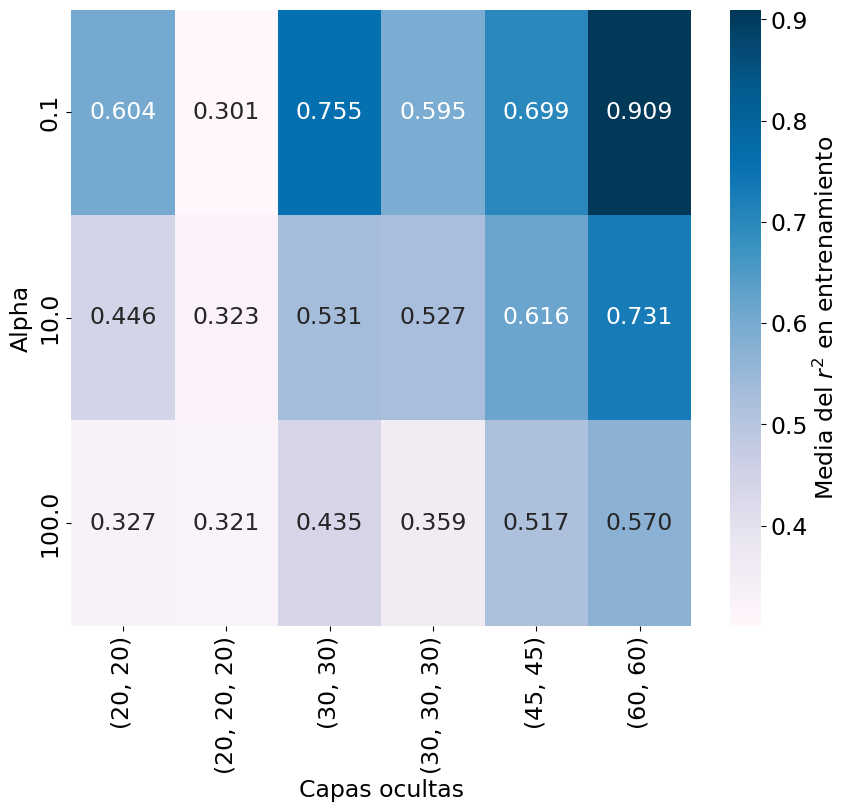

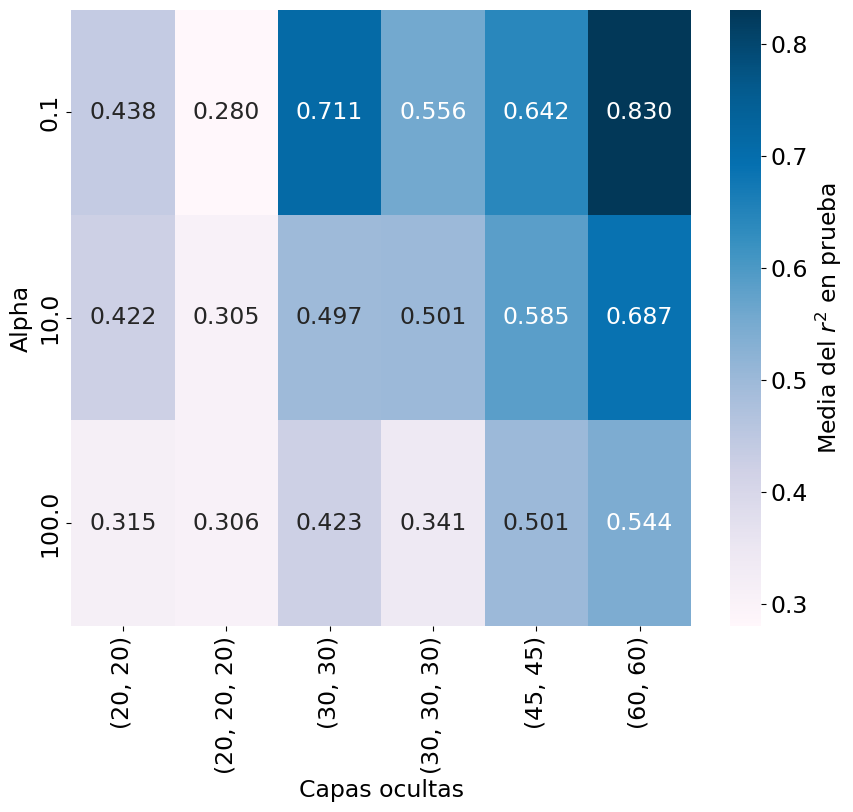

In [ ]:


# Pivotar el DataFrame para el formato adecuado para el mapa de calor
pivot_table = results_no_escalados_df.pivot_table(
    index='param_alpha',
    columns='param_hidden_layer_sizes',
    values='mean_train_score'
)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(pivot_table, annot=True, fmt=".3f",  cmap='PuBu',cbar_kws={'label': 'Media del $r^2$ en entrenamiento'})
#plt.title('Mapa de Calor: train_r2 vs. Capas ocultas y Activación')
plt.xlabel('Capas ocultas')
plt.ylabel('Alpha')
plt.show()

# Pivotar el DataFrame para el formato adecuado para el mapa de calor
pivot_table = results_no_escalados_df.pivot_table(
    index='param_alpha',
    columns='param_hidden_layer_sizes',
    values='mean_test_score'
)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(pivot_table, annot=True, fmt=".3f",  cmap='PuBu',cbar_kws={'label': 'Media del $r^2$ en prueba'})
#plt.title('Mapa de Calor: train_r2 vs. Capas ocultas y Activación')
plt.xlabel('Capas ocultas')
plt.ylabel('Alpha')
plt.show()

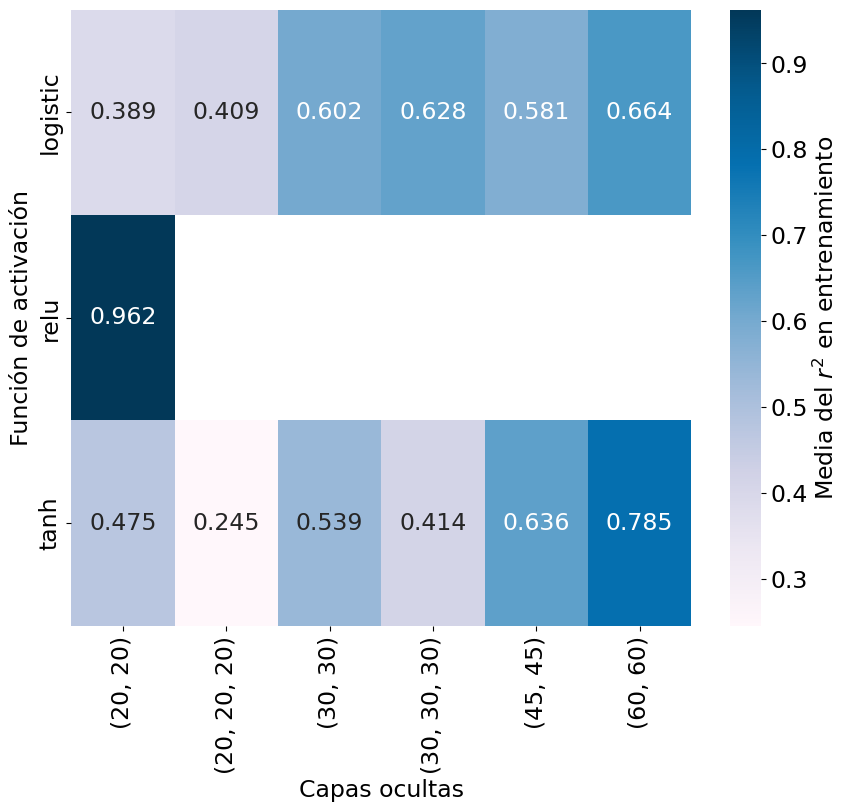

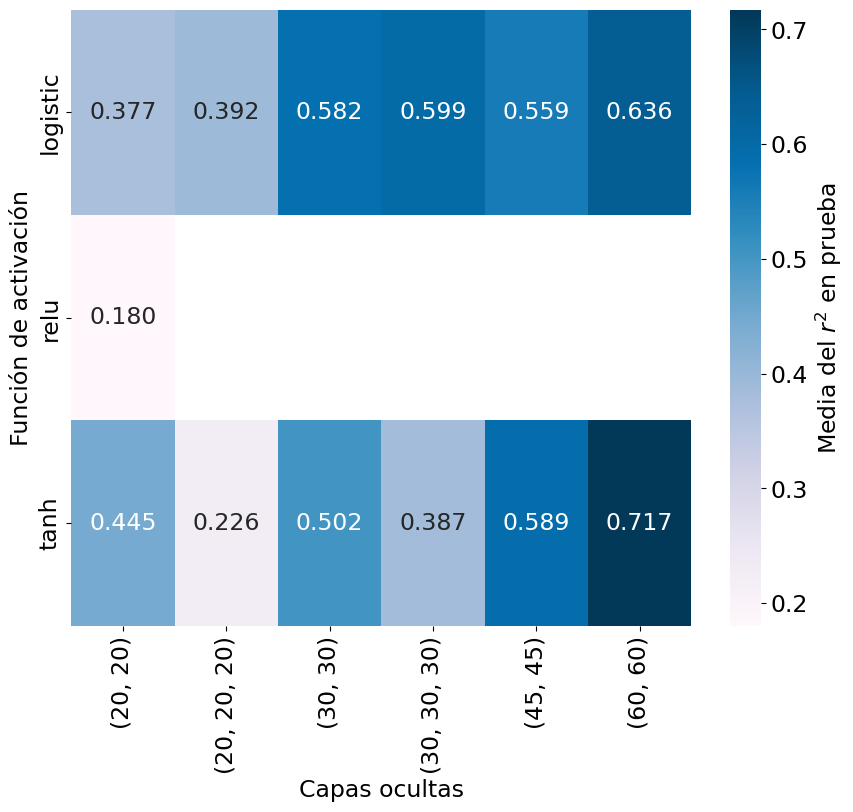

In [190]:
# Pivotar el DataFrame para el formato adecuado para el mapa de calor
pivot_table = results_no_escalados_df.pivot_table(
    index='param_activation',
    columns='param_hidden_layer_sizes',
    values='mean_train_score'
)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(pivot_table, annot=True, fmt=".3f",  cmap='PuBu',cbar_kws={'label': 'Media del $r^2$ en entrenamiento'})
#plt.title('Mapa de Calor: train_r2 vs. Capas ocultas y Activación')
plt.xlabel('Capas ocultas')
plt.ylabel('Función de activación')
plt.show()

# Pivotar el DataFrame para el formato adecuado para el mapa de calor
pivot_table = results_no_escalados_df.pivot_table(
    index='param_activation',
    columns='param_hidden_layer_sizes',
    values='mean_test_score'
)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(pivot_table, annot=True, fmt=".3f",  cmap='PuBu',cbar_kws={'label': 'Media del $r^2$ en prueba'})
#plt.title('Mapa de Calor: train_r2 vs. Capas ocultas y Activación')
plt.xlabel('Capas ocultas')
plt.ylabel('Función de activación')
plt.show()

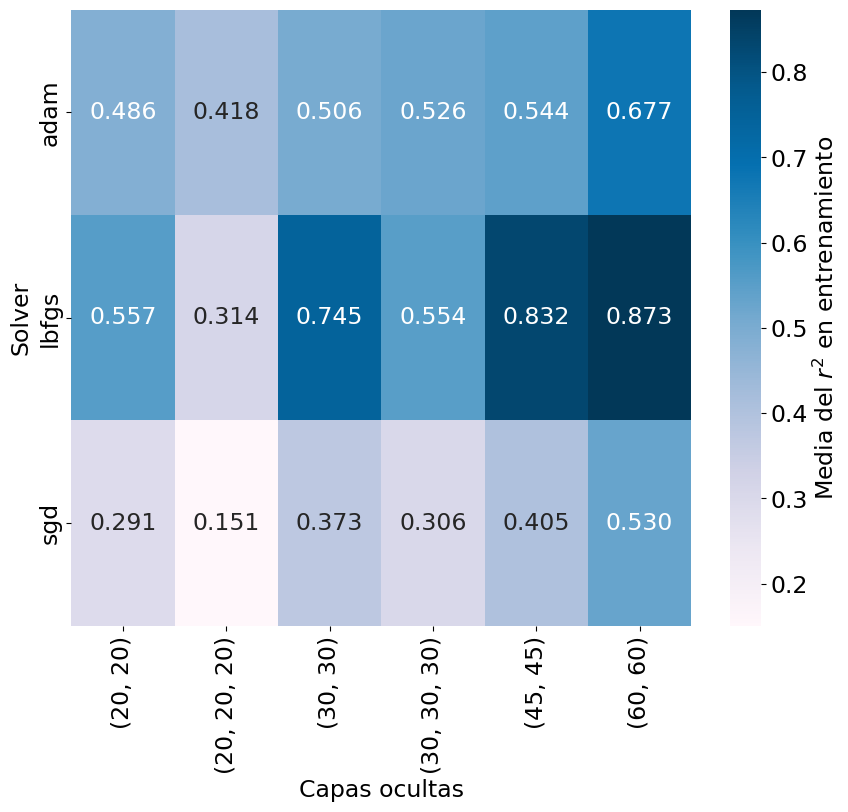

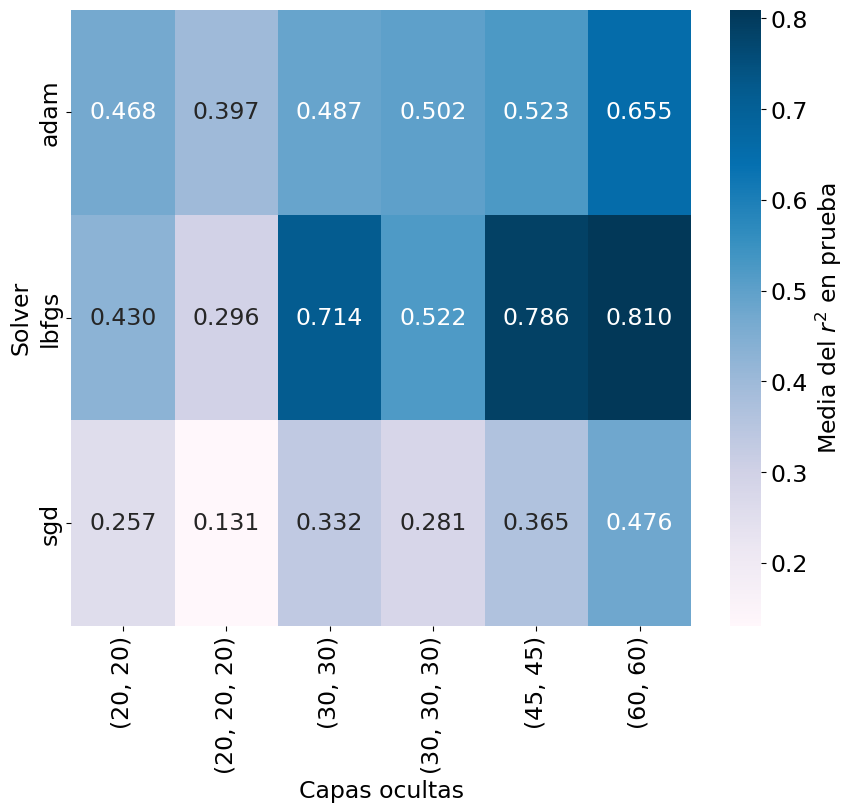

In [192]:
# Pivotar el DataFrame para el formato adecuado para el mapa de calor
pivot_table = results_no_escalados_df.pivot_table(
    index='param_solver',
    columns='param_hidden_layer_sizes',
    values='mean_train_score'
)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(pivot_table, annot=True, fmt=".3f",  cmap='PuBu',cbar_kws={'label': 'Media del $r^2$ en entrenamiento'})
#plt.title('Mapa de Calor: train_r2 vs. Capas ocultas y Activación')
plt.xlabel('Capas ocultas')
plt.ylabel('Solver')
plt.show()

# Pivotar el DataFrame para el formato adecuado para el mapa de calor
pivot_table = results_no_escalados_df.pivot_table(
    index='param_solver',
    columns='param_hidden_layer_sizes',
    values='mean_test_score'
)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(pivot_table, annot=True, fmt=".3f",  cmap='PuBu',cbar_kws={'label': 'Media del $r^2$ en prueba'})
#plt.title('Mapa de Calor: train_r2 vs. Capas ocultas y Activación')
plt.xlabel('Capas ocultas')
plt.ylabel('Solver')
plt.show()

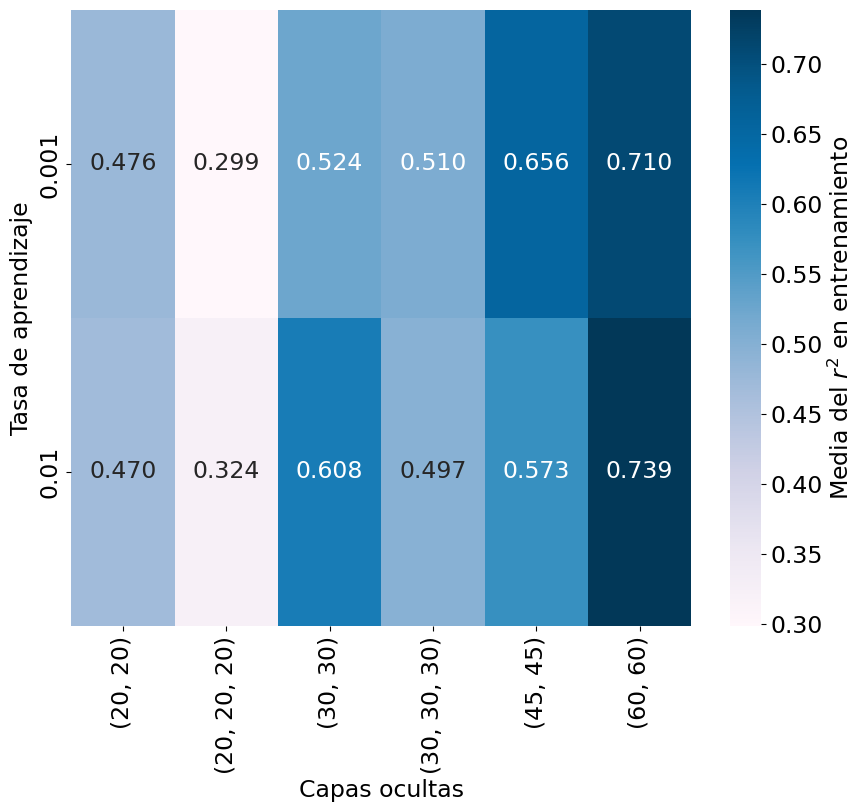

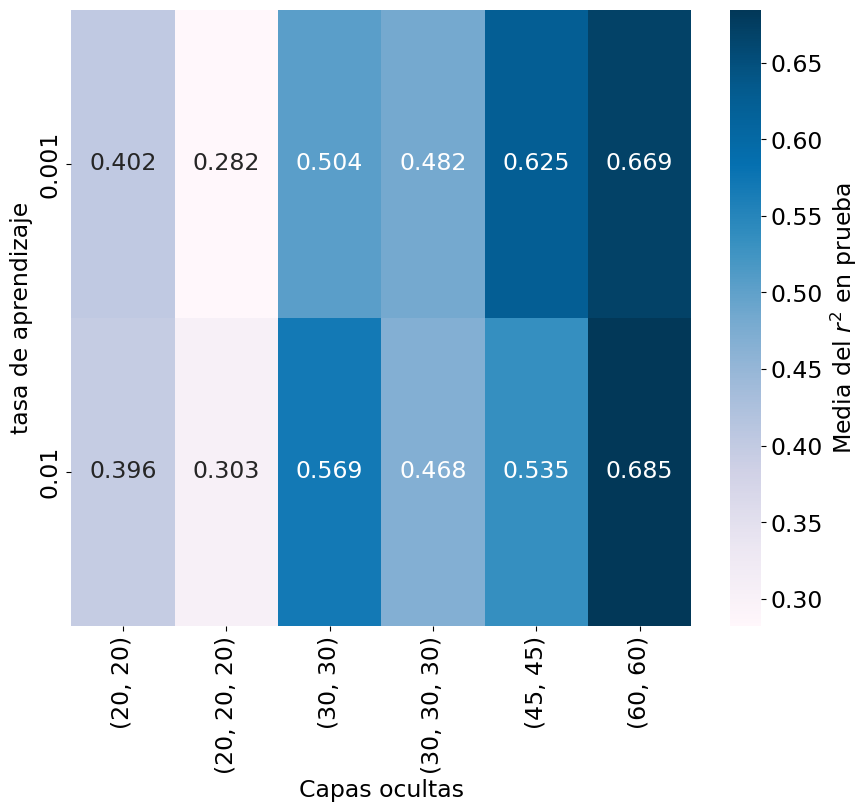

In [193]:
# Pivotar el DataFrame para el formato adecuado para el mapa de calor
pivot_table = results_no_escalados_df.pivot_table(
    index='param_learning_rate_init',
    columns='param_hidden_layer_sizes',
    values='mean_train_score'
)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(pivot_table, annot=True, fmt=".3f",  cmap='PuBu',cbar_kws={'label': 'Media del $r^2$ en entrenamiento'})
#plt.title('Mapa de Calor: train_r2 vs. Capas ocultas y Activación')
plt.xlabel('Capas ocultas')
plt.ylabel('Tasa de aprendizaje')
plt.show()

# Pivotar el DataFrame para el formato adecuado para el mapa de calor
pivot_table = results_no_escalados_df.pivot_table(
    index='param_learning_rate_init',
    columns='param_hidden_layer_sizes',
    values='mean_test_score'
)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(pivot_table, annot=True, fmt=".3f",  cmap='PuBu',cbar_kws={'label': 'Media del $r^2$ en prueba'})
#plt.title('Mapa de Calor: train_r2 vs. Capas ocultas y Activación')
plt.xlabel('Capas ocultas')
plt.ylabel('tasa de aprendizaje')
plt.show()

# **Método Hold-Out para la mejor RNA**

In [17]:
mlp=MLPRegressor(hidden_layer_sizes=(60, 60),
                 alpha=0.1,
                 activation="tanh",
                 solver="lbfgs",
                 learning_rate_init=0.01,
                 random_state=42,
                 max_iter=70000,)
mlp=mlp.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [18]:
#ENTRENAMIENTO
predict_test= mlp.predict(X_train)
y_true = y_train
# Calculando las métricas
R2 = r2_score(y_true, predict_test)
MAE = mean_absolute_error(y_true, predict_test)
RMSE = np.sqrt(mean_squared_error(y_true, predict_test))
print(R2, MAE, RMSE)


0.9271380899309808 4.125988685100659 6.642494709485383


In [19]:
#PRUEBA
predict_test= mlp.predict(X_test)
y_true = y_test
# Calculando las métricas
R2 = r2_score(y_true, predict_test)
MAE = mean_absolute_error(y_true, predict_test)
RMSE = np.sqrt(mean_squared_error(y_true, predict_test))
print(R2, MAE, RMSE)

0.8679977454847965 8.297329666655136 13.692639889746411
